In [1]:
#!/usr/bin/env python3su
# coding: utf-8

In [2]:
import pandas as pd

## 50/30/20 Budget Rule
---
- 50% Needs
- 30% Wants
- 20% Savings
Avg recommendations 

### Needs - 50 %
- Home 20%
- Utilities 5%
- Food 10%
- Transportation 5%
- Medical 5%
- Debt 5%

### Wants - 30 %
- Lifestyle 30%

### Savings - 20%
- Savings 20%

# Colors
---

In [3]:
red = 'tomato'
coral = 'FF8360' 
pastel_pink ='DA9598'
rajah = 'FFAA5A'
light_red = 'ED6A5A'
soft_colors = [light_red, 'lightsalmon', rajah, 'gold', 'lightgreen', 'mediumturquoise', 'lightblue', 'lightgray', 'white']
contrast_colors = colors = ['tomato', 'lightsalmon', 'darkorange', 'gold', 'lightgreen', 'mediumturquoise', 'lightblue', 'lightgray', 'white']

In [4]:
def show_svg(filename):
    from IPython.display import SVG, display
    display(SVG(filename=f'{filename}.svg'))

In [5]:
def budget_table(year_tot):
    income = year_tot
    print(f'Total Yearly income:\t\t{income}')
    print('---------------------------------------')
    # savings = int(income * .10/12)
    print('Monthly Ideal amounts')
    print('---------------------------------------')
    print('---------------------------------------')
    print('Category\tPercent\t\tAmount')
    print('---------------------------------------')
    income_dict = {}
    print(f'Home\t\t(25%)\t\t{int(income * .25/12)}')
    income_dict['home'] = [30, int(income * .30/12)]


    print(f'Lifestyle\t(30%)\t\t{int(income * .30/12)}')
    income_dict['lifestyle'] = [15, int(income * .15/12)]


    print(f'Debt\t\t( 5%)\t\t{int(income * .05/12)}')
    income_dict['debt'] = [10, int(income * .10/12)]


    print(f'Savings\t\t(20%)\t\t{int(income * .20/12)}')
    income_dict['savings'] = [20, int(income * .10/12)]


    print(f'Food\t\t(10%)\t\t{int(income * .10/12)}')
    income_dict['food'] = [10, int(income * .15/12)]

    print(f'Transpo\t\t( 5%)\t\t{int(income * .05/12)}')
    income_dict['transportation'] = [10, int(income * .10/12)]


    print(f'Util\t\t( 5%)\t\t{int(income * .05/12)}')
    income_dict['utility'] = [5, int(income * .10/12)]
    return income_dict

In [6]:
income = 100000
income_dict = budget_table(income)

Total Yearly income:		100000
---------------------------------------
Monthly Ideal amounts
---------------------------------------
---------------------------------------
Category	Percent		Amount
---------------------------------------
Home		(25%)		2083
Lifestyle	(30%)		2500
Debt		( 5%)		416
Savings		(20%)		1666
Food		(10%)		833
Transpo		( 5%)		416
Util		( 5%)		416


In [7]:
income_dict

{'home': [30, 2500],
 'lifestyle': [15, 1250],
 'debt': [10, 833],
 'savings': [20, 833],
 'food': [10, 1250],
 'transportation': [10, 833],
 'utility': [5, 833]}

In [8]:
ideal_dict = pd.DataFrame.from_dict(income_dict)

In [9]:
ideal_frame = ideal_dict.T.reset_index().rename(columns={'index':'category', 0:'percent_ideal', 1:'allocated'})

In [10]:
percent = [i[0] for i in income_dict.values()]
val = [i[1] for i in income_dict.values()]

In [11]:
val

[2500, 1250, 833, 833, 1250, 833, 833]

In [12]:
list(income_dict.keys())

['home', 'lifestyle', 'debt', 'savings', 'food', 'transportation', 'utility']

In [13]:
ordered_ideal_budget = pd.Series(val, index= list(income_dict.keys())).sort_values(ascending=False)
ordered_ideal_budget

home              2500
food              1250
lifestyle         1250
utility            833
transportation     833
savings            833
debt               833
dtype: int64

In [14]:
ordered_ideal_budget.index

Index(['home', 'food', 'lifestyle', 'utility', 'transportation', 'savings',
       'debt'],
      dtype='object')

In [27]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(
    #rotation = -100,
    labels= ordered_ideal_budget.index,
    values= ordered_ideal_budget.values
)])

fig.update_traces(hoverinfo='label + value', textinfo='label + percent', textfont_size=10,
                  marker=dict(colors=contrast_colors, line=dict(color='lightgrey', width=1)))
fig.update_layout(title_text="Ideal Budget")
fig.write_image('pie_ideal_budget.svg')
#fig.show()

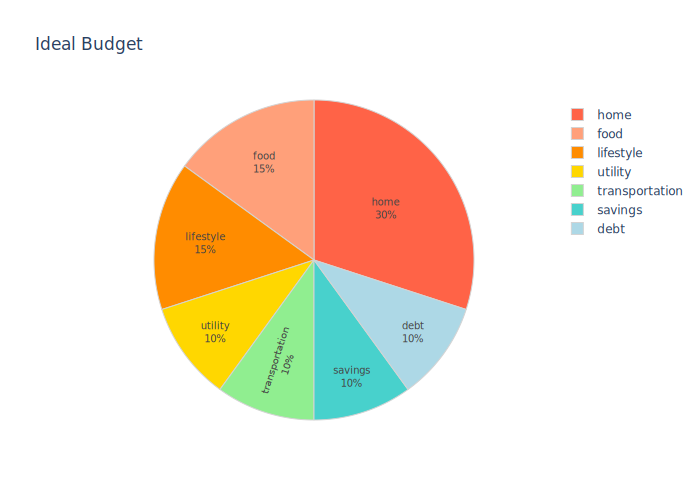

In [28]:
show_svg('pie_ideal_budget')

In [17]:
#def get_spending(item):
    #return input(f'How much do you spend monthly on {item.capitalize()}?\n')

In [18]:
seed_answers = [2500, 1500, 500, 500, 800, 200, 500]
actual = seed_answers

In [19]:
categories = list(ideal_frame['category'])
#actual = []
# for category in categories:
#         actual.append(int(get_spending(category))
ideal_frame['actual'] = actual
extra = pd.Series(['unspent', 0, 0, 0], index=ideal_frame.columns)
ideal_frame = ideal_frame.append(extra, ignore_index=True)
overage = pd.Series(['overage', 0, 0, 0], index=ideal_frame.columns)
ideal_frame = ideal_frame.append(overage, ignore_index=True)

In [20]:
total_spent = sum(ideal_frame.actual)
spending_difference = sum(ideal_frame.actual) - sum(ideal_frame.allocated)
print(f'You make ${int(income/12)} a month')
print(f'You spend ${total_spent} a month')
print(f'You spend ${spending_difference} over or under your budget')

You make $8333 a month
You spend $6500 a month
You spend $-1832 over or under your budget


In [21]:
if spending_difference < 1:
    ideal_frame['actual'][7] = spending_difference*-1
elif spending_difference > 1:
    ideal_frame['actual'][8] = spending_difference*-1

/Users/Jen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
pie_group = ideal_frame.sort_values(['actual'], ascending=False)
pie_group

,category,percent_ideal,allocated,actual
0,home,30,2500,2500
7,unspent,0,0,1832
1,lifestyle,15,1250,1500
4,food,10,1250,800
2,debt,10,833,500
3,savings,20,833,500
6,utility,5,833,500
5,transportation,10,833,200
8,overage,0,0,0


In [23]:
red = 'tomato'
coral = 'FF8360' 
pastel_pink ='DA9598'
rajah = 'FFAA5A'
light_red = 'ED6A5A'

In [24]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Pie
    (
        rotation = 100,
        labels=pie_group.category,
        values= pie_group.actual
    )
])
                                                               
fig.update_traces(hoverinfo='label + value', textinfo='label + percent', textfont_size=10,
                  marker=dict(colors=soft_colors, line=dict(color='lightgrey', width=1)))
fig.update_layout(title_text="Actual Spending")
fig.write_image('pie_actual_spending.svg')
#fig.show()
show_svg('pie_actual_spending')

In [25]:
pie_group

,category,percent_ideal,allocated,actual
0,home,30,2500,2500
7,unspent,0,0,1832
1,lifestyle,15,1250,1500
4,food,10,1250,800
2,debt,10,833,500
3,savings,20,833,500
6,utility,5,833,500
5,transportation,10,833,200
8,overage,0,0,0


In [26]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = pie_group.category

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(
    labels=pie_group.category,
    values=pie_group.allocated,
    name="Essential"),
              1, 1)
fig.add_trace(go.Pie(
    labels=pie_group.category, 
    values=list(pie_group.actual), 
    name="Non-Essential"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textinfo='label + percent', marker=dict(colors=soft_colors[:len(labels)], line=dict(color='lightgrey', width=1)))

fig.update_layout(
    title_text="Budget vs Actual",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Budget', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='Actual', x=0.80, y=0.5, font_size=10, showarrow=False)])
fig.write_image('donut_budget_V_actual.svg')
#fig.show()
show_svg('donut_budget_V_actual')